#Collections

**This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple**

In [1]:
collections_types = {
    'namedtuple()':'Factory function for creating tuple subclasses with named fields',
    'deque':'List-like container with fast appends and pops on either end',
    'Counter':'dict subclass for counting hashable objects',
    'OrderedDict':'dict subclass that remembers the order entried were added',
    'defaultdict':'dict subclass that calls a factory function to supply missing values',
}

In [2]:
collection_examples = {}

##Counter

In [3]:
import collections
from collections import Counter

In [4]:
# Tally occurrences of words in a list
cnt = Counter()
for word in ['red', 'blue', 'red', 'green', 'blue', 'blue']:
    cnt[word] += 1

In [5]:
cnt

Counter({'blue': 3, 'red': 2, 'green': 1})

In [6]:
# Find the ten most common words in Hamlet
import re
import nltk
#words = re.findall(r'\w+', open('hamlet.txt').read().lower())
#Counter(words).most_common(10)

In [7]:
words = nltk.corpus.shakespeare.words(fileid='hamlet.xml')

In [8]:
C_Object = Counter(words)

In [9]:
C_Object.most_common(10)

[(u',', 3211),
 (u'.', 1289),
 (u'the', 996),
 (u"'", 909),
 (u'and', 705),
 (u'to', 640),
 (u'of', 631),
 (u'I', 606),
 (u';', 580),
 (u':', 519)]

In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
hamlet_words = Counter()
for word in words:
    if word not in stopwords:
        hamlet_words[word] += 1

In [12]:
hamlet_words.most_common(10)

[(u',', 3211),
 (u'.', 1289),
 (u"'", 909),
 (u'I', 606),
 (u';', 580),
 (u':', 519),
 (u'?', 417),
 (u'HAMLET', 389),
 (u'!', 279),
 (u'And', 263)]

In [13]:
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
punctuation = list(string.punctuation)

In [96]:
hamlet_words_no_punct = Counter()

In [97]:
for word in hamlet_words:
    if word not in punctuation:
        hamlet_words_no_punct[word] += 1

In [98]:
collection_examples['Counter'] = 'hamlet_words_no_punct.most_common(10)'

In [99]:
eval(collection_examples['Counter'])

[(u'forgone', 1),
 (u'shelf', 1),
 (u'pardon', 1),
 (u'nunnery', 1),
 (u'lunacies', 1),
 (u'doubts', 1),
 (u'foul', 1),
 (u'Remorseless', 1),
 (u'four', 1),
 (u'hath', 1)]

In [100]:
del hamlet_words_no_punct['foul']
eval(collection_examples['Counter'])

[(u'forgone', 1),
 (u'shelf', 1),
 (u'pardon', 1),
 (u'nunnery', 1),
 (u'lunacies', 1),
 (u'doubts', 1),
 (u'Remorseless', 1),
 (u'four', 1),
 (u'hath', 1),
 (u'straws', 1)]

###elements()  
**No Order, 0 or lower count will be skipped**  

In [ ]:
hamlet_words_no_punct.elements

###most_common

In [ ]:
hamlet_words_no_punct.most_common(1)

###subtract

In [ ]:
top10

In [ ]:
Counter.subtract(hamlet_words_no_punct)

In [ ]:
hamlet_words_no_punct.subtract(hamlet_words_no_punct)

In [ ]:
hamlet_words_no_punct.most_common(10)

In [ ]:
hamlet_words_no_punctb = hamlet_words_no_punct.copy()
for i in range(10):
    for word in hamlet_words_no_punctb:
        hamlet_words_no_punct.update(word)
hamlet_words_no_punct.most_common(10)

In [101]:
collection_examples['Counter'] = hamlet_words_no_punct

    sum(c.values())                 # total of all counts
    c.clear()                       # reset all counts
    list(c)                         # list unique elements
    set(c)                          # convert to a set
    dict(c)                         # convert to a regular dictionary
    c.items()                       # convert to a list of (elem, cnt) pairs
    Counter(dict(list_of_pairs))    # convert from a list of (elem, cnt) pairs
    c.most_common()[:-n-1:-1]       # n least common elements
    c += Counter()                  # remove zero and negative counts

    c = Counter(a=3, b=1)
    d = Counter(a=1, b=2)
    c + d                       # add two counters together:  c[x] + d[x]

    c - d                       # subtract (keeping only positive counts)

    c & d                       # intersection:  min(c[x], d[x])

    c | d                       # union:  max(c[x], d[x])

#deque 

In [22]:
from collections import deque

In [23]:
candle = deque()

###append(x)

In [24]:
candle.append('flame-Right')

In [25]:
candle

deque(['flame-Right'])

###candle.appendleft()

In [26]:
candle.appendleft('flame-Left')

In [27]:
candle

deque(['flame-Left', 'flame-Right'])

###clear()

In [28]:
candle.clear()

In [29]:
candle

deque([])

###count()

In [30]:
elements = ('C','C','H','N','O','O','S','Si','O','N','N','N')

In [31]:
for element in elements:
    candle.append(element)
elements.count('N')

4

###extend()

In [32]:
meteor = ('Ta','Fe', 'P', 'Ni', 'Mn')

In [33]:
ultima = candle.extend(meteor)

In [34]:
candle

deque(['C', 'C', 'H', 'N', 'O', 'O', 'S', 'Si', 'O', 'N', 'N', 'N', 'Ta', 'Fe', 'P', 'Ni', 'Mn'])

###extendleft()

In [35]:
organo_pattern = ('chno', 'chno', 'chno', 'chno')
candle.extendleft(organo_pattern)
candle

deque(['chno', 'chno', 'chno', 'chno', 'C', 'C', 'H', 'N', 'O', 'O', 'S', 'Si', 'O', 'N', 'N', 'N', 'Ta', 'Fe', 'P', 'Ni', 'Mn'])

###pop()

In [36]:
candle.pop()

'Mn'

In [37]:
candle

deque(['chno', 'chno', 'chno', 'chno', 'C', 'C', 'H', 'N', 'O', 'O', 'S', 'Si', 'O', 'N', 'N', 'N', 'Ta', 'Fe', 'P', 'Ni'])

###popleft()

In [38]:
candle.popleft()

'chno'

In [39]:
candle

deque(['chno', 'chno', 'chno', 'C', 'C', 'H', 'N', 'O', 'O', 'S', 'Si', 'O', 'N', 'N', 'N', 'Ta', 'Fe', 'P', 'Ni'])

###remove()

In [40]:
candle.remove('C')

In [41]:
candle

deque(['chno', 'chno', 'chno', 'C', 'H', 'N', 'O', 'O', 'S', 'Si', 'O', 'N', 'N', 'N', 'Ta', 'Fe', 'P', 'Ni'])

###reverse()

In [42]:
candle.reverse()

In [43]:
candle

deque(['Ni', 'P', 'Fe', 'Ta', 'N', 'N', 'N', 'O', 'Si', 'S', 'O', 'O', 'N', 'H', 'C', 'chno', 'chno', 'chno'])

In [44]:
import os
print(candle[0]), os.system('say -v Boing ' + str(candle[0]))

Ni 0


###rotate

In [45]:
candle.rotate(3)

In [46]:
candle

deque(['chno', 'chno', 'chno', 'Ni', 'P', 'Fe', 'Ta', 'N', 'N', 'N', 'O', 'Si', 'S', 'O', 'O', 'N', 'H', 'C'])

In [103]:
collection_examples['deque'] = candle

###maxlen()

In [47]:
candle.maxlen

In [48]:
print(candle.maxlen)

None


In [49]:
match = deque(maxlen=5)

In [50]:
material = ('C','S','P','Mn','N')

In [51]:
for element in material:
    match.append(element)

In [52]:
match

deque(['C', 'S', 'P', 'Mn', 'N'], maxlen=5)

In [53]:
len(match)

5

In [54]:
match.appendleft('As')

In [55]:
match

deque(['As', 'C', 'S', 'P', 'Mn'], maxlen=5)

##defaultdict()

In [56]:
from collections import defaultdict

In [57]:
stars = [('Terra','1'),('Jenna', '2'), ('Debby', '3'), ('Seka', '4'), ('Tiffany','5')]

In [58]:
screen = defaultdict(list)

In [59]:
for star, scene in stars:
    screen[star].append(scene)

In [60]:
screen

defaultdict(<type 'list'>, {'Seka': ['4'], 'Tiffany': ['5'], 'Debby': ['3'], 'Jenna': ['2'], 'Terra': ['1']})

In [61]:
screen.default_factory = 'um'

In [62]:
screen.items()

[('Seka', ['4']),
 ('Tiffany', ['5']),
 ('Debby', ['3']),
 ('Jenna', ['2']),
 ('Terra', ['1'])]

In [63]:
alphabits = 'abcdefghijklmnopqrstuvwxyz'
cake = defaultdict(int)
for piece in alphabits:
    cake[piece] += 0

In [64]:
cake.items()

[('a', 0),
 ('c', 0),
 ('b', 0),
 ('e', 0),
 ('d', 0),
 ('g', 0),
 ('f', 0),
 ('i', 0),
 ('h', 0),
 ('k', 0),
 ('j', 0),
 ('m', 0),
 ('l', 0),
 ('o', 0),
 ('n', 0),
 ('q', 0),
 ('p', 0),
 ('s', 0),
 ('r', 0),
 ('u', 0),
 ('t', 0),
 ('w', 0),
 ('v', 0),
 ('y', 0),
 ('x', 0),
 ('z', 0)]

In [65]:
words = nltk.corpus.shakespeare.words(fileid='hamlet.xml')

In [66]:
for word in words:
    for letter in word:
        cake[letter] += 1

In [67]:
cake

defaultdict(<type 'int'>, {u'!': 288, u"'": 961, u'&': 5, u'-': 416, u',': 3269, u'.': 1317, u';': 582, u':': 531, u'?': 424, u'A': 1558, u'C': 466, u'B': 241, u'E': 1445, u'D': 517, u'G': 436, u'F': 226, u'I': 1504, u'H': 927, u'K': 131, u'J': 9, u'M': 614, u'L': 1164, u'O': 1069, u'N': 836, u'Q': 95, u'P': 301, u'S': 777, u'R': 892, u'U': 662, u'T': 1521, u'W': 436, u'V': 33, u'Y': 108, u'Z': 70, 'a': 8712, 'c': 2385, 'b': 1577, 'e': 14426, 'd': 4865, 'g': 2064, 'f': 2495, 'i': 7413, 'h': 7697, 'k': 1130, 'j': 101, 'm': 3622, 'l': 5334, 'o': 10384, 'n': 7775, 'q': 124, 'p': 1715, 's': 7920, 'r': 7235, 'u': 4078, 't': 10935, 'w': 2665, 'v': 1185, 'y': 3073, 'x': 177, 'z': 51})

In [68]:
cake.items()

[(u'!', 288),
 (u"'", 961),
 (u'&', 5),
 (u'-', 416),
 (u',', 3269),
 (u'.', 1317),
 (u';', 582),
 (u':', 531),
 (u'?', 424),
 (u'A', 1558),
 (u'C', 466),
 (u'B', 241),
 (u'E', 1445),
 (u'D', 517),
 (u'G', 436),
 (u'F', 226),
 (u'I', 1504),
 (u'H', 927),
 (u'K', 131),
 (u'J', 9),
 (u'M', 614),
 (u'L', 1164),
 (u'O', 1069),
 (u'N', 836),
 (u'Q', 95),
 (u'P', 301),
 (u'S', 777),
 (u'R', 892),
 (u'U', 662),
 (u'T', 1521),
 (u'W', 436),
 (u'V', 33),
 (u'Y', 108),
 (u'Z', 70),
 ('a', 8712),
 ('c', 2385),
 ('b', 1577),
 ('e', 14426),
 ('d', 4865),
 ('g', 2064),
 ('f', 2495),
 ('i', 7413),
 ('h', 7697),
 ('k', 1130),
 ('j', 101),
 ('m', 3622),
 ('l', 5334),
 ('o', 10384),
 ('n', 7775),
 ('q', 124),
 ('p', 1715),
 ('s', 7920),
 ('r', 7235),
 ('u', 4078),
 ('t', 10935),
 ('w', 2665),
 ('v', 1185),
 ('y', 3073),
 ('x', 177),
 ('z', 51)]

In [104]:
hamlet = plt.Figure()

In [70]:
%matplotlib inline

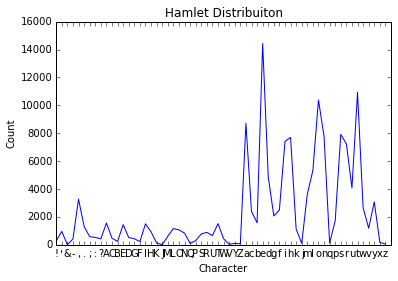

In [71]:
import matplotlib.pyplot as plt
lines = []
counts = []
for line, count in cake.items():
    lines.append(line)
    counts.append(count)
plots = zip(lines,counts)
plt.xlabel('Character')
plt.ylabel('Count')
#plt.legend
plt.plot(counts)
plt.xticks(range(0,len(lines)), lines, rotation=0)
plt.title('Hamlet Distribuiton')

In [72]:
plots[0][1]

288

In [73]:
for entry in plots:
    print(entry[0][0])

!
'
&
-
,
.
;
:
?
A
C
B
E
D
G
F
I
H
K
J
M
L
O
N
Q
P
S
R
U
T
W
V
Y
Z
a
c
b
e
d
g
f
i
h
k
j
m
l
o
n
q
p
s
r
u
t
w
v
y
x
z


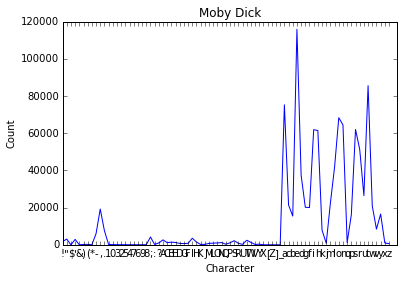

In [80]:

import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
#Jesse Bacon
#Putz Moby Dick into a Matrix and then graphs the charecter frequency distribution.
#Ready for Styles and everything.
#Requires NLTK and Matplotlib

words = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

def letter_matrix():
    cake = {}
    alphabits = 'abcdefghijklmnopqrstuvwxyz'
    cake = defaultdict(int)
    for piece in alphabits:
        cake[piece] += 0
    return cake

def zip_book(wordlist,matrix):
    for word in wordlist:
        for letter in word:
            matrix[letter] += 1
    return matrix

def make_frequency_chart(zipped_book, title, filename):
    lines = []
    counts = []
    for line, count in zipped_book.items():
        lines.append(line)
        counts.append(count)
    plots = zip(lines,counts)
    plt.xlabel('Character')
    plt.ylabel('Count')
    #plt.legend #ary
    plt.plot(counts)
    plt.xticks(range(0,len(lines)), lines, rotation=0)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

matrix = letter_matrix()
frequency = zip_book(words, matrix)
make_frequency_chart(frequency, 'Moby Dick', 'MobyDick.jpg')

In [81]:
nltk.corpus.gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [82]:
words = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [83]:
len(words)

260819

In [84]:
matrix = letter_matrix()

In [85]:
matrix

defaultdict(<type 'int'>, {'a': 0, 'c': 0, 'b': 0, 'e': 0, 'd': 0, 'g': 0, 'f': 0, 'i': 0, 'h': 0, 'k': 0, 'j': 0, 'm': 0, 'l': 0, 'o': 0, 'n': 0, 'q': 0, 'p': 0, 's': 0, 'r': 0, 'u': 0, 't': 0, 'w': 0, 'v': 0, 'y': 0, 'x': 0, 'z': 0})

In [86]:
frequency = zip_book(words, matrix)

In [87]:
frequency

defaultdict(<type 'int'>, {u'!': 1767, u'"': 3071, u'$': 2, u"'": 2922, u'&': 2, u')': 215, u'(': 215, u'*': 45, u'-': 5984, u',': 19229, u'.': 7558, u'1': 142, u'0': 131, u'3': 47, u'2': 60, u'5': 55, u'4': 39, u'7': 53, u'6': 37, u'9': 35, u'8': 59, u';': 4173, u':': 196, u'?': 1004, u'A': 2650, u'C': 1147, u'B': 1426, u'E': 1237, u'D': 751, u'G': 640, u'F': 804, u'I': 3543, u'H': 1462, u'K': 177, u'J': 253, u'M': 752, u'L': 900, u'O': 988, u'N': 1186, u'Q': 322, u'P': 1048, u'S': 2209, u'R': 823, u'U': 240, u'T': 2457, u'W': 1305, u'V': 171, u'Y': 330, u'X': 23, u'[': 3, u'Z': 38, u']': 3, u'_': 26, 'a': 75266, 'c': 21360, 'b': 15451, 'e': 115855, 'd': 37468, 'g': 20180, 'f': 20029, 'i': 61891, 'h': 61434, 'k': 7882, 'j': 829, 'm': 22525, 'l': 41893, 'o': 68338, 'n': 64431, 'q': 1234, 'p': 16207, 's': 62022, 'r': 51311, 'u': 26457, 't': 85539, 'w': 20917, 'v': 8427, 'y': 16542, 'x': 1007, 'z': 594})

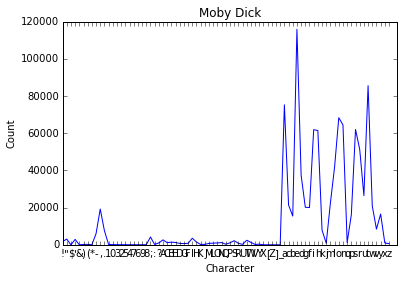

In [90]:
make_frequency_chart(frequency, 'Moby Dick','MobyDick.jpg')

In [105]:
collection_examples['DefaultDict'] = cake

In [108]:
collection_examples.keys()

['DefaultDict', 'deque', 'Counter']

#namedtuple()

**Named tuples are especially useful for assigning field names to result tuples returned by the csv or sqlite3 modules**

In [109]:
from collections import namedtuple

In [114]:
coordinates = namedtuple( 'marker', ['x', 'y'] )

In [140]:
id3_tages = namedtuple( 'song', ['header','title','artist', 'album', 'speed', 'genre', 'startTime', 'endTime'] )

In [118]:
mp3s

__main__.song

In [119]:
coordinates

__main__.marker

In [147]:
dir(mp3s)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getslice__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_fields',
 '_make',
 '_replace',
 'album',
 'artist',
 'count',
 'endTime',
 'genre',
 'header',
 'index',
 'speed',
 'startTime',
 'title']

In [153]:
mp3s.speed = '88bpm'

In [154]:
mp3s.speed

'88bpm'

In [155]:
mp3s

__main__.song

##_make

In [162]:
song = ['Itunes Authorized Purchase','Kinderszenen, Op. 15: No. 7. Träumerei','Ernst Gröschel', '100 Most Relaxing Classical', \
        '256 kbps', 'Classical', '0', '42']
purchase = mp3s._make(song)

In [163]:
purchase

song(header='Itunes Authorized Purchase', title='Kinderszenen, Op. 15: No. 7. Tr\xc3\xa4umerei', artist='Ernst Gr\xc3\xb6schel', album='100 Most Relaxing Classical', speed='256 kbps', genre='Classical', startTime='0', endTime='42')

In [164]:
purchase.endTime

'42'

In [165]:
#for OSX
!afplay ./1-45\ Kinderszenen,\ Op.\ 15_\ No.\ 7.\ Träumerei.m4a

In [166]:
collection_examples['namedtuple'] = purchase

##_asdict()

In [168]:
purchase._asdict()

OrderedDict([('header', 'Itunes Authorized Purchase'), ('title', 'Kinderszenen, Op. 15: No. 7. Tr\xc3\xa4umerei'), ('artist', 'Ernst Gr\xc3\xb6schel'), ('album', '100 Most Relaxing Classical'), ('speed', '256 kbps'), ('genre', 'Classical'), ('startTime', '0'), ('endTime', '42')])

##_replace()

In [169]:
purchase._replace(header='Pirated')

song(header='Pirated', title='Kinderszenen, Op. 15: No. 7. Tr\xc3\xa4umerei', artist='Ernst Gr\xc3\xb6schel', album='100 Most Relaxing Classical', speed='256 kbps', genre='Classical', startTime='0', endTime='42')

##_fields()

In [171]:
purchase._fields

('header',
 'title',
 'artist',
 'album',
 'speed',
 'genre',
 'startTime',
 'endTime')

##getattr()

In [173]:
getattr(purchase, 'speed')

'88bpm'

In [174]:
purchase.speed

'88bpm'

In [176]:
mp3s._replace('header', 'Itunes Authorized Purchase')

TypeError: unbound method _replace() must be called with song instance as first argument (got str instance instead)

In [177]:
mp3s.header = 'Itunes Authorized Purchase'

In [178]:
purchase.header

'Itunes Authorized Purchase'

##_fields

In [179]:
purchase._fields

('header',
 'title',
 'artist',
 'album',
 'speed',
 'genre',
 'startTime',
 'endTime')

#OrderedDict

**Ordered dictionaries are just like regular dictionaries but they remember the order that items were inserted. When iterating over an ordered dictionary, the items are returned in the order their keys were first added.**

In [185]:
from collections import OrderedDict

In [186]:
gene_sequence = OrderedDict()

In [187]:
Symbols = ['A','C','G','T','U','W','S','M','K','R','Y','B','D','H','V','N','-']

In [261]:
Description = ['Adenine', 'Cytosine', 'Guanine', 'Thymine', 'Uracil', 'Weak', 'Strong', \
              'aMino', 'Keto', 'puRine', 'pYrimidine', 'not A (B comes after A)', \
              'not C (D comes adter C)', 'not G (H comes after G)', 'not T (V comes after T and U', \
              'any nucleotide (not a gap)', 'any nucleotide (not a gap)']

In [260]:
bases = {}
bases['Adenine'] = ['A',0,0,0]
bases['Cytosine'] = [0,'C',0,0]
bases['Guanine'] = [0,0,'G',0]
bases['Thymine'] = [0,0,0,'T']
bases['Uracil'] = [0,0,0,'U']
bases['Weak'] = ['A',0,0,'T']
bases['Strong'] = [0,'C','G',0]
bases['aMino'] = ['A','C',0,0]
bases['Keto'] = [0,0,'G','T']
bases['puRine'] = ['A',0,'G',0]
bases['pYrimidine'] = [0,'C',0,'T']
bases['not A (B comes after A)'] = [0,'C','G','T']
bases['not C (D comes adter C)'] = ['A',0,'G','T']
bases['not G (H comes after G)'] = ['A','C',0,'T']
bases['not T (V comes after T and U'] = ['A','C','G',0]
bases['any nucleotide (not a gap)'] = ['A','C','G','T']

In [228]:
sequences

{}

In [199]:
singles = [ bases['Adenine'], bases['Cytosine'], bases['Guanine'], bases['Thymine'], bases['Uracil'], ]

In [200]:
doubles = [ bases['Weak'], bases['Strong'], bases['aMino'], bases['Keto'], bases['puRine'], bases['pYrimidine'],  ]

In [205]:
triples = [ bases['not A (B comes after A)'],  bases['not C (D comes adter C)'], \
                  bases['not G (H comes after G)'], bases['not T (V comes after T and U'], ]

In [207]:
quadruples = bases['any nucleotide (not a gap)']

In [213]:
IUPAC = {'singles':singles, 'doubles':doubles, 'triples':triples, 'quadruples':quadruples}

In [215]:
IUPAC['singles'][0]

['A', 0, 0, 0]

In [216]:
IUPAC['singles'][0][0]

'A'

In [217]:
import numpy as np

In [218]:
vals = range(0, len(Symbols))

In [219]:
np.random.shuffle(vals)

In [267]:
gene_sequence.clear()

In [268]:
for num in vals:
    print [Symbols[num]],Description[num]
    gene_sequence[Symbols[num]] = Description[num]

['R'] puRine
['W'] Weak
['-'] any nucleotide (not a gap)
['A'] Adenine
['D'] not C (D comes adter C)
['K'] Keto
['H'] not G (H comes after G)
['S'] Strong
['T'] Thymine
['V'] not T (V comes after T and U
['U'] Uracil
['N'] any nucleotide (not a gap)
['B'] not A (B comes after A)
['Y'] pYrimidine
['G'] Guanine
['C'] Cytosine
['M'] aMino


In [277]:
gene_sequence

OrderedDict([('R', 'puRine'), ('W', 'Weak'), ('-', 'any nucleotide (not a gap)'), ('A', 'Adenine'), ('D', 'not C (D comes adter C)'), ('K', 'Keto'), ('H', 'not G (H comes after G)'), ('S', 'Strong'), ('T', 'Thymine'), ('V', 'not T (V comes after T and U'), ('U', 'Uracil'), ('N', 'any nucleotide (not a gap)'), ('B', 'not A (B comes after A)'), ('Y', 'pYrimidine'), ('G', 'Guanine'), ('C', 'Cytosine'), ('M', 'aMino')])

In [293]:
dna_sample.clear()

In [294]:
dna_sample = OrderedDict()
for base in gene_sequence.values():
    #print(base,bases[base])
    dna_sample[base] = bases[base]

In [295]:
dna_sample

OrderedDict([('puRine', ['A', 0, 'G', 0]), ('Weak', ['A', 0, 0, 'T']), ('any nucleotide (not a gap)', ['A', 'C', 'G', 'T']), ('Adenine', ['A', 0, 0, 0]), ('not C (D comes adter C)', ['A', 0, 'G', 'T']), ('Keto', [0, 0, 'G', 'T']), ('not G (H comes after G)', ['A', 'C', 0, 'T']), ('Strong', [0, 'C', 'G', 0]), ('Thymine', [0, 0, 0, 'T']), ('not T (V comes after T and U', ['A', 'C', 'G', 0]), ('Uracil', [0, 0, 0, 'U']), ('not A (B comes after A)', [0, 'C', 'G', 'T']), ('pYrimidine', [0, 'C', 0, 'T']), ('Guanine', [0, 0, 'G', 0]), ('Cytosine', [0, 'C', 0, 0]), ('aMino', ['A', 'C', 0, 0])])

In [296]:
collection_examples['OrderedDict'] = dna_sample

In [300]:
collection_examples.keys()

['DefaultDict', 'deque', 'Counter', 'OrderedDict', 'namedtuple']

In [301]:
pandora = collection_examples

##popitem()

In [303]:
dna_sample.popitem()

('aMino', ['A', 'C', 0, 0])

In [307]:
pandora.keys()

['DefaultDict', 'deque', 'Counter', 'OrderedDict', 'namedtuple']

In [308]:
pandora

{'Counter': Counter({u'forgone': 1, u'shelf': 1, u'pardon': 1, u'nunnery': 1, u'lunacies': 1, u'doubts': 1, u'Remorseless': 1, u'four': 1, u'hath': 1, u'straws': 1, u'Does': 1, u'sleep': 1, u'maid': 1, u'sweep': 1, u'appetite': 1, u'evermore': 1, u'hate': 1, u'yonder': 1, u'conjure': 1, u'Marcellus': 1, u'patches': 1, u'Blasting': 1, u'tween': 1, u'swoopstake': 1, u'whatsoever': 1, u'lord': 1, u'sorry': 1, u'pride': 1, u'worth': 1, u'Pelion': 1, u'mines': 1, u'beget': 1, u'moiety': 1, u'cozenage': 1, u'appal': 1, u'blanket': 1, u'rise': 1, u'Directly': 1, u'replication': 1, u'every': 1, u'wince': 1, u'govern': 1, u'Old': 1, u'month': 1, u'bringing': 1, u'winnowed': 1, u'encounter': 1, u'chapel': 1, u'jointress': 1, u'Lamond': 1, u'school': 1, u'scholar': 1, u'conceive': 1, u'withers': 1, u'companies': 1, u'wards': 1, u'solid': 1, u'convenience': 1, u'Hercules': 1, u'sexton': 1, u'succession': 1, u'Go': 1, u'graces': 1, u'triumph': 1, u'whirlwind': 1, u'achievements': 1, u'parted': 1, u